In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

## Chapter 4: Training models
#### 2022-02-27

### 1. Linear regression

In [5]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

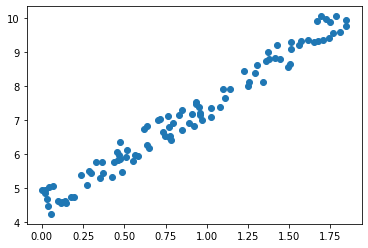

In [24]:
plt.scatter(X,y)

In [13]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
theta_best

array([[4.46668693],
       [2.99897765]])

In [18]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

(0.0, 2.0, 0.0, 15.0)

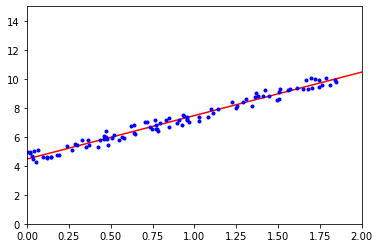

In [22]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_,lin_reg.intercept_

(array([[2.99897765]]), array([4.46668693]))

In [26]:
# Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100

In [27]:
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [28]:
theta

array([[4.46668693],
       [2.99897765]])

### 2. Polynomial regression with y = 0.5 x^2+2

In [220]:
def polyf(x):
    return 0.5*x**2+2

In [221]:
m=100
X = 6*np.random.rand(m,1)-3
y = polyf(X)+np.random.randn(m,1)

In [222]:
xlist = np.linspace(-3,3,200)

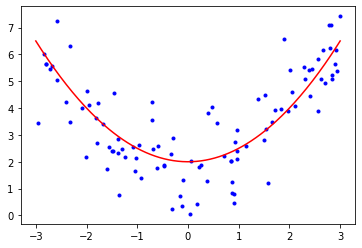

In [223]:
plt.plot(X,y,'b.')
plt.plot(xlist,polyf(xlist),'r-')

In [224]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_feat.fit_transform(X)

In [225]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.09137579, 0.51218986]]), array([1.81379206]))

In [226]:
x_new = np.array(xlist).reshape((200,1))
y_new = lin_reg.predict(poly_feat.fit_transform(x_new))

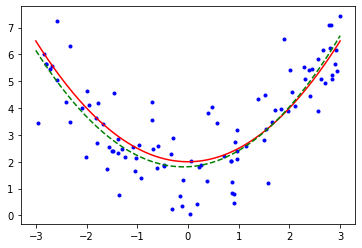

In [227]:
plt.plot(X,y,'b.')
plt.plot(xlist,polyf(xlist),'r-')
plt.plot(x_new,y_new,'g--')

In [228]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [229]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth = 2,label="train")
    plt.plot(np.sqrt(val_errors),'b-',linewidth = 3, label="validation")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

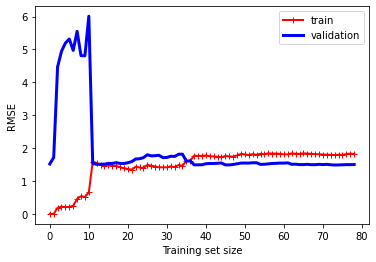

In [230]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [231]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_feat",PolynomialFeatures(degree=3,include_bias =False)),
    ("sgd_reg",LinearRegression()),))

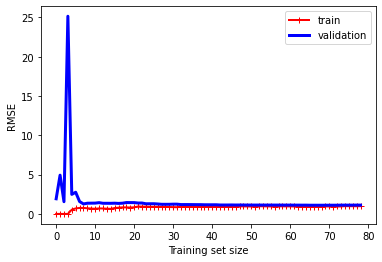

In [232]:
plot_learning_curves(polynomial_regression,X,y)

### 3. Regularized linear models

In [240]:
def polyf(x):
    return 0.5*x**2+x+1

In [241]:
m=100
X = 6*np.random.rand(m,1)-3
y = polyf(X)+np.random.randn(m,1)

In [242]:
xlist = np.linspace(-3,3,200)

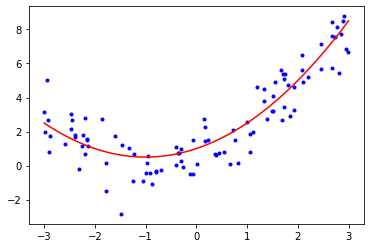

In [243]:
plt.plot(X,y,'b.')
plt.plot(xlist,polyf(xlist),'r-')

In [259]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#### 3.1 Ridge regression

In [244]:
X_new = np.array([[-3],[3]])
y_predict_list = []
alpha_list = []
for a in [0,10,100]:
    ridge_reg = Ridge(alpha = a, solver ="cholesky")
    ridge_reg.fit(X,y.ravel())
    y_predict = ridge_reg.predict(X_new)
    y_predict_list.append(y_predict)
    alpha_list.append(a)

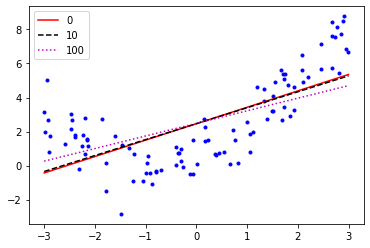

In [245]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict_list[0],'r-',label=alpha_list[0])
plt.plot(X_new,y_predict_list[1],'k--',label=alpha_list[1])
plt.plot(X_new,y_predict_list[2],'m:',label=alpha_list[2])
plt.legend()

In [246]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
poly_feat = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = poly_feat.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
Xstd_poly = scaler.transform(X_poly)

In [247]:
xlist = np.linspace(-3,3,200)
X_new = np.array(xlist).reshape((200,1))
y_predict_list = []
alpha_list = []
for a in [0,1,0.01]:
    ridge_reg = Ridge(alpha = a, solver ="cholesky")
    ridge_reg.fit(Xstd_poly,y.ravel())
    Xnew_poly = poly_feat.fit_transform(X_new)
    Xnew_poly_std = scaler.transform(Xnew_poly)
    y_predict = ridge_reg.predict(Xnew_poly_std)
    y_predict_list.append(y_predict)
    alpha_list.append(a)

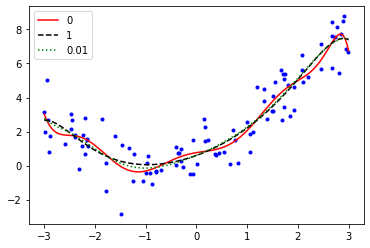

In [248]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict_list[0],'r-',label=alpha_list[0])
plt.plot(X_new,y_predict_list[1],'k--',label=alpha_list[1])
plt.plot(X_new,y_predict_list[2],'g:',label=alpha_list[2])
plt.legend()

In [249]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X,y)

/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

In [250]:
X_new = np.array([[-3],[3]])
y_predict = sgd_reg.predict(X_new)

In [251]:
sgd_reg.coef_

array([0.9700534])

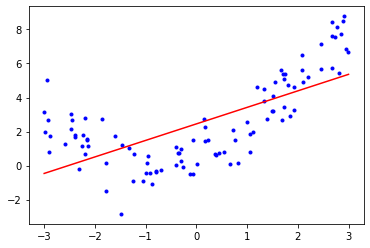

In [252]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict,'r-')

#### 3.2 Lasso regression

In [253]:
X_new = np.array([[-3],[3]])
y_predict_list = []
alpha_list = []
for a in [0,0.1,1]:
    lasso_reg = Lasso(alpha = a)
    lasso_reg.fit(X,y.ravel())
    y_predict = lasso_reg.predict(X_new)
    y_predict_list.append(y_predict)
    alpha_list.append(a)

/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.49416932090722, tolerance: 0.06686295361056367
  positive)


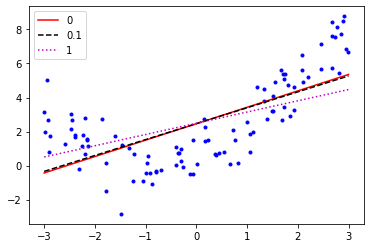

In [254]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict_list[0],'r-',label=alpha_list[0])
plt.plot(X_new,y_predict_list[1],'k--',label=alpha_list[1])
plt.plot(X_new,y_predict_list[2],'m:',label=alpha_list[2])
plt.legend()

In [255]:
poly_feat = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = poly_feat.fit_transform(X)
scaler = scaler = StandardScaler()
scaler.fit(X_poly)
Xstd_poly = scaler.transform(X_poly)

In [258]:
xlist = np.linspace(-3,3,200)
X_new = np.array(xlist).reshape((200,1))
y_predict_list = []
alpha_list = []
for a in [0,1,10]:
    lasso_reg = Lasso(alpha = a)
    lasso_reg.fit(Xstd_poly,y.ravel())
    print(lasso_reg.intercept_,lasso_reg.coef_)
    Xnew_poly = poly_feat.fit_transform(X_new)
    Xnew_poly_std = scaler.transform(Xnew_poly)
    y_predict = lasso_reg.predict(Xnew_poly_std)
    y_predict_list.append(y_predict)
    alpha_list.append(a)

2.5446446691435307 [ 2.31659625  1.36056007 -0.86779117  1.49159896  0.1009725  -1.18757303
  0.76664994 -0.24314521 -0.61889707  0.09769947]
2.5446446691435307 [0.74471117 0.59135715 0.         0.         0.         0.
 0.         0.         0.         0.        ]
2.5446446691435307 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.99617697967424, tolerance: 0.06686295361056367
  positive)


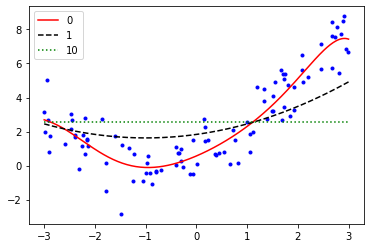

In [257]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict_list[0],'r-',label=alpha_list[0])
plt.plot(X_new,y_predict_list[1],'k--',label=alpha_list[1])
plt.plot(X_new,y_predict_list[2],'g:',label=alpha_list[2])
plt.legend()

#### 3.3 Elastic Net

In [320]:
poly_feat = PolynomialFeatures(degree = 10, include_bias = False)
X_poly = poly_feat.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
Xstd_poly = scaler.transform(X_poly)

In [321]:
xlist = np.linspace(-3,3,200)
X_new = np.array(xlist).reshape((200,1))
y_predict_list = []
alpha_list = []
for a in [0,0.1,1]:
    en_reg = ElasticNet(alpha = a, l1_ratio = 0.5)
    en_reg.fit(Xstd_poly,y.ravel())
    print(en_reg.intercept_,en_reg.coef_)
    Xnew_poly = poly_feat.fit_transform(X_new)
    Xnew_poly_std = scaler.transform(Xnew_poly)
    y_predict = en_reg.predict(Xnew_poly_std)
    y_predict_list.append(y_predict)
    alpha_list.append(a)

2.3686792920958637 [ 1.88150386  0.89817793 -2.61279367  0.94901589  3.90617836 -0.52310861
 -0.13132733 -0.40745823 -1.35912133  0.1902729 ]
2.368679292095864 [ 1.09833971  0.92111468  0.35562392  0.14870514  0.12969256  0.
  0.          0.          0.         -0.        ]
2.368679292095864 [0.46593697 0.28179917 0.29908813 0.19721313 0.17024285 0.08388333
 0.06116186 0.         0.         0.        ]


/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.89527799376316, tolerance: 0.051064540547172535
  positive)


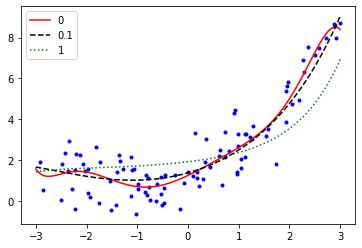

In [322]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict_list[0],'r-',label=alpha_list[0])
plt.plot(X_new,y_predict_list[1],'k--',label=alpha_list[1])
plt.plot(X_new,y_predict_list[2],'g:',label=alpha_list[2])
plt.legend()

### 4. Early stopping

In [323]:
def polyf(x):
    return 0.5*x**2+x+1

In [324]:
m=100
X = 6*np.random.rand(m,1)-3
y = polyf(X)+np.random.randn(m,1)

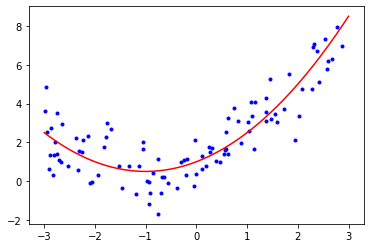

In [327]:
xlist = np.linspace(-3,3,200)

plt.plot(X,y,'b.')
plt.plot(xlist,polyf(xlist),'r-')

In [369]:
poly_feat = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_feat.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
Xstd_poly = scaler.transform(X_poly)

In [370]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xstd_poly,y,test_size = 0.2, random_state = 30)

In [371]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, warm_start = True, penalty = 'l1', learning_rate = "constant",eta0 = 0.00001)

n_epoch = 1000
minimum_val_error = float('inf')
best_epoch = None
best_model = None
val_error_list = []
train_error_list = []
for epoch in range(n_epoch):
    sgd_reg.fit(X_train,y_train.ravel())
    y_test_predict = sgd_reg.predict(X_test)
    y_train_predict = sgd_reg.predict(X_train)
    val_error = mean_squared_error(y_test_predict, y_test)
    train_error = mean_squared_error(y_train_predict,y_train)
    val_error_list.append(val_error)
    train_error_list.append(train_error)
    if val_error<minimum_val_error:
        mimimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/chenxu/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  

In [372]:
best_epoch

999

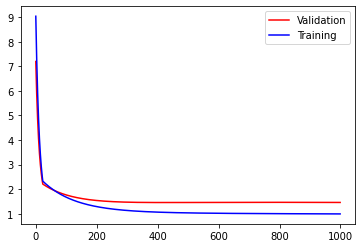

In [373]:
plt.plot(range(n_epoch),val_error_list,'r-',label = 'Validation')
plt.plot(range(n_epoch),train_error_list,'b-',label='Training')
plt.legend()